https://x.com/Amatusora_heiwa/status/1673987379504480261

In [1]:
using Distributions
using StaticArrays
using StatsPlots
default(fmt=:png)

In [2]:
A = @SMatrix [
     4  7 10
     6  4  6
    13  3  2
]

3×3 SMatrix{3, 3, Int64, 9} with indices SOneTo(3)×SOneTo(3):
  4  7  10
  6  4   6
 13  3   2

In [3]:
degree_of_freedom(A) = (size(A, 1) - 1)*(size(A, 2) - 1)

function pearson_expectation_value(A)
    n = sum(A)
    c = sum(A; dims=1)
    r = sum(A; dims=2)
    r*c/n
end

function pearson_chisq(A)
    E = pearson_expectation_value(A)
    sum((a - e)^2/e for (a, e) in zip(A, E))
end

function pvalue_pearson_chisq(A)
    df = degree_of_freedom(A)
    chi2 = pearson_chisq(A)
    ccdf(Chisq(df), chi2)
end

function pearson_adjusted_standardized_residual(A)
    n = sum(A)
    c = sum(A; dims=1)
    r = sum(A; dims=2)
    p = c/n
    q = r/n
    E = r*c/n
    (A - E) ./ .√(E .* ((1 .- q)*(1 .- p)))
end

@show pearson_chisq(A)
@show degree_of_freedom(A)
@show pvalue_pearson_chisq(A)
asr = pearson_adjusted_standardized_residual(A)
display(asr)
pval_asr = @. 2ccdf(Normal(), abs(asr))

pearson_chisq(A) = 11.817872479104361
degree_of_freedom(A) = 4
pvalue_pearson_chisq(A) = 0.01875826997083007


3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -2.6906     1.05419     1.84979
 -0.415847  -0.0495671   0.483171
  3.18839   -1.04354    -2.38298

3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 0.00713237  0.291797  0.0643431
 0.677522    0.960467  0.628974
 0.00143066  0.2967    0.017173

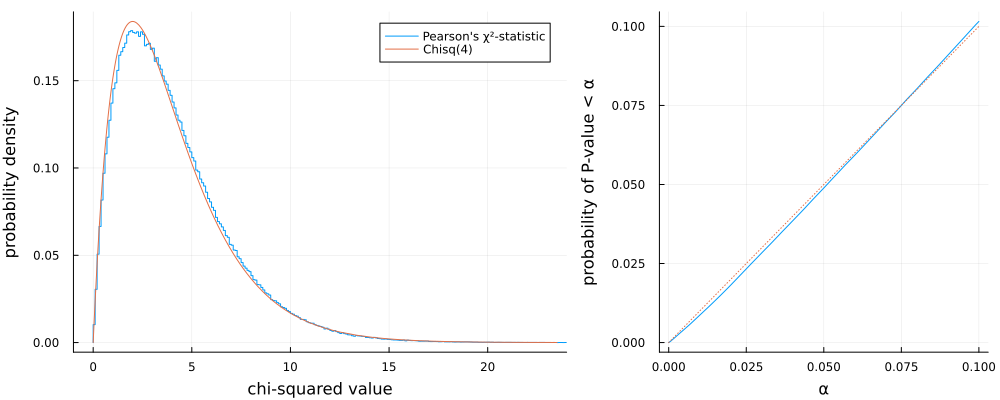

In [5]:
c = sum(A; dims=1)
r = sum(A; dims=2)
n = sum(A)
E = r * c / n
prodpoi = product_distribution((Poisson(λ) for λ in vec(E))...)
L = 10^6
X = [reshape(rand(prodpoi), 3, 3) for _ in 1:L]
Chi2 = pearson_chisq.(X)
df = (length(c) - 1)*(length(r) - 1)

P = stephist(Chi2; norm=true, label="Pearson's χ²-statistic")
plot!(Chisq(df); label="Chisq($df)")
plot!(xlim=(-1, 24))
plot!(xguide="chi-squared value", yguide="probability density")

Pval = ccdf.(Chisq(df), Chi2)
Q = plot(α -> count(<(α), Pval)/length(Pval), 0, 0.1; label="")
plot!(identity, 0, 0.1; ls=:dot, label="")
plot!(xguide="α", yguide="probability of P-value < α")

plot(P, Q; size=(1000, 400), layout=@layout [a b{0.4w}])
plot!(bottommargin=4Plots.mm, leftmargin=4Plots.mm)

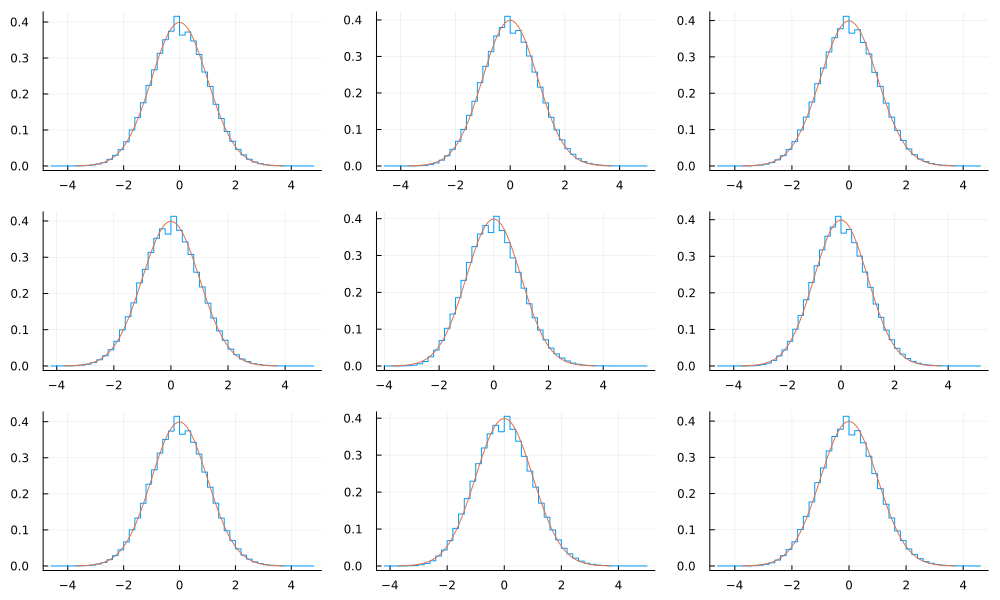

In [6]:
ASR = pearson_adjusted_standardized_residual.(X)
PP = []
for i in 1:3, j in 1:3
    P = stephist(getindex.(ASR, i, j); norm=true, bin=50, label="")
    plot!(Normal(); label="")
    push!(PP, P)
end
plot(PP...; size=(1000, 600), layout=(3, 3))

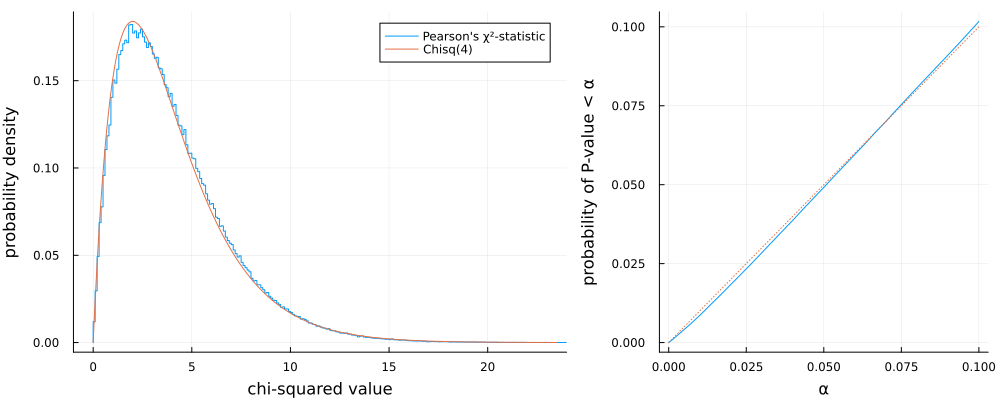

In [7]:
c = sum(A; dims=1)
r = sum(A; dims=2)
n = sum(A)
p = c / n
q = r / n
P = q * p
mult = Multinomial(n, vec(P))
L = 10^6
X = [reshape(rand(mult), 3, 3) for _ in 1:L]
Chi2 = pearson_chisq.(X)
df = (length(c) - 1)*(length(r) - 1)

P = stephist(Chi2; norm=true, label="Pearson's χ²-statistic")
plot!(Chisq(df); label="Chisq($df)")
plot!(xlim=(-1, 24))
plot!(xguide="chi-squared value", yguide="probability density")

Pval = ccdf.(Chisq(df), Chi2)
Q = plot(α -> count(<(α), Pval)/length(Pval), 0, 0.1; label="")
plot!(identity, 0, 0.1; ls=:dot, label="")
plot!(xguide="α", yguide="probability of P-value < α")

plot(P, Q; size=(1000, 400), layout=@layout [a b{0.4w}])
plot!(bottommargin=4Plots.mm, leftmargin=4Plots.mm)

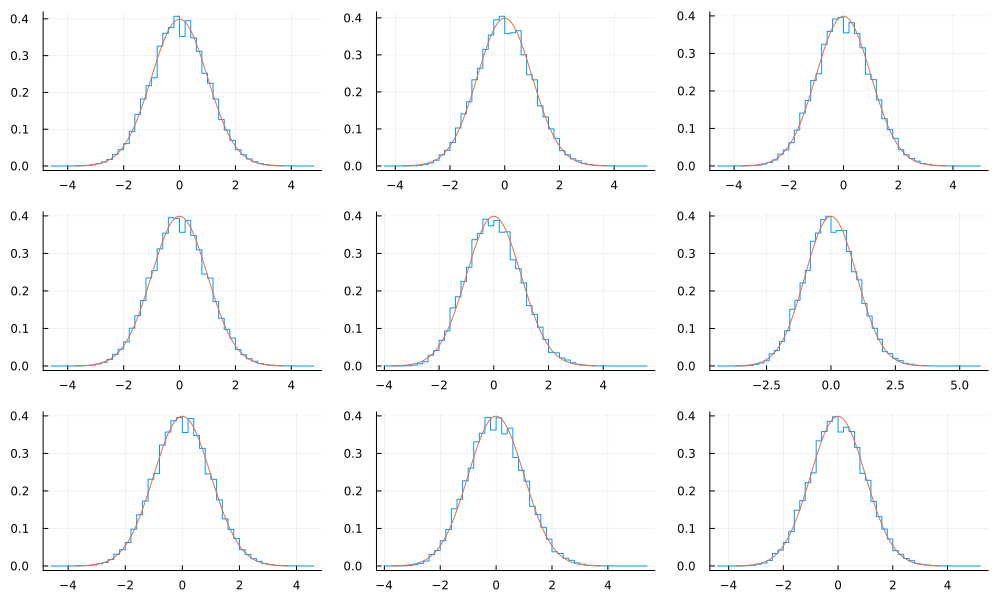

In [8]:
ASR = pearson_adjusted_standardized_residual.(X)
PP = []
for i in 1:3, j in 1:3
    P = stephist(getindex.(ASR, i, j); norm=true, bin=50, label="")
    plot!(Normal(); label="")
    push!(PP, P)
end
plot(PP...; size=(1000, 600), layout=(3, 3))

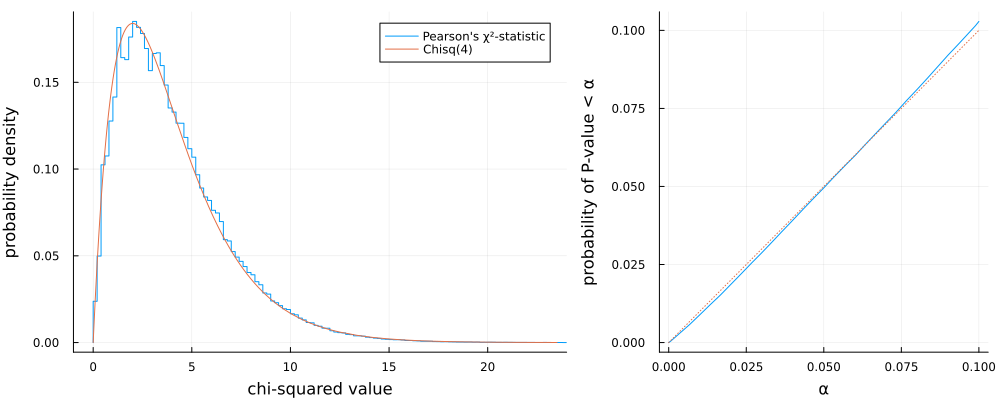

In [9]:
c = sum(A; dims=1)
r = sum(A; dims=2)
n = sum(A)
p = c / n
q = r / n
P = q * p
mult = [Multinomial(m, vec(p)) for m in vec(r)]
L = 10^6
X = [[rand(mult[1])'; rand(mult[2])'; rand(mult[3])'] for _ in 1:L]
Chi2 = pearson_chisq.(X)
df = (length(c) - 1)*(length(r) - 1)

P = stephist(Chi2; norm=true, bin=200, label="Pearson's χ²-statistic")
plot!(Chisq(df); label="Chisq($df)")
plot!(xlim=(-1, 24))
plot!(xguide="chi-squared value", yguide="probability density")

Pval = ccdf.(Chisq(df), Chi2)
Q = plot(α -> count(<(α), Pval)/length(Pval), 0, 0.1; label="")
plot!(identity, 0, 0.1; ls=:dot, label="")
plot!(xguide="α", yguide="probability of P-value < α")

plot(P, Q; size=(1000, 400), layout=@layout [a b{0.4w}])
plot!(bottommargin=4Plots.mm, leftmargin=4Plots.mm)

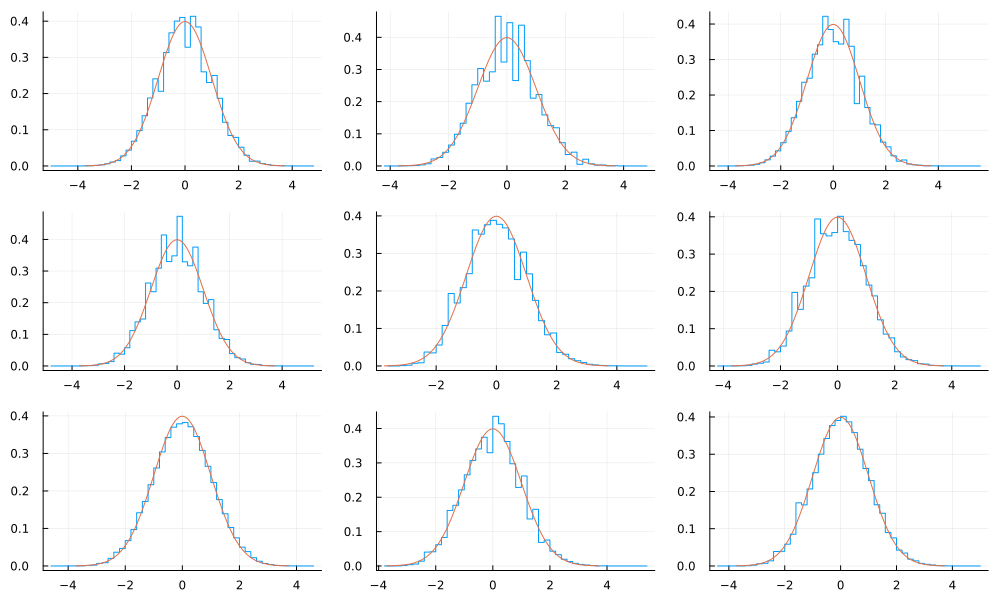

In [10]:
ASR = pearson_adjusted_standardized_residual.(X)
PP = []
for i in 1:3, j in 1:3
    P = stephist(getindex.(ASR, i, j); norm=true, bin=50, label="")
    plot!(Normal(); label="")
    push!(PP, P)
end
plot(PP...; size=(1000, 600), layout=(3, 3))

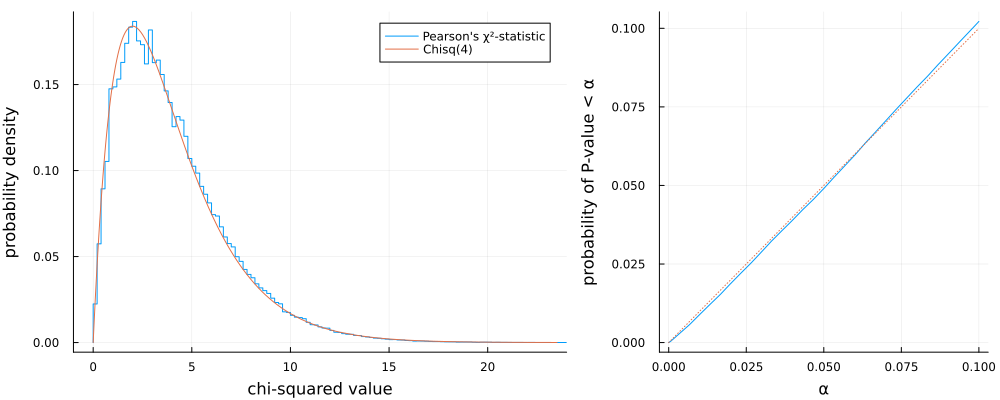

In [11]:
c = sum(A; dims=1)
r = sum(A; dims=2)
n = sum(A)
p = c / n
q = r / n
P = q * p
mult = [Multinomial(m, vec(q)) for m in vec(c)]
L = 10^6
X = [[rand(mult[1]) rand(mult[2]) rand(mult[3])] for _ in 1:L]
Chi2 = pearson_chisq.(X)
df = (length(c) - 1)*(length(r) - 1)

P = stephist(Chi2; norm=true, bin=200, label="Pearson's χ²-statistic")
plot!(Chisq(df); label="Chisq($df)")
plot!(xlim=(-1, 24))
plot!(xguide="chi-squared value", yguide="probability density")

Pval = ccdf.(Chisq(df), Chi2)
Q = plot(α -> count(<(α), Pval)/length(Pval), 0, 0.1; label="")
plot!(identity, 0, 0.1; ls=:dot, label="")
plot!(xguide="α", yguide="probability of P-value < α")

plot(P, Q; size=(1000, 400), layout=@layout [a b{0.4w}])
plot!(bottommargin=4Plots.mm, leftmargin=4Plots.mm)

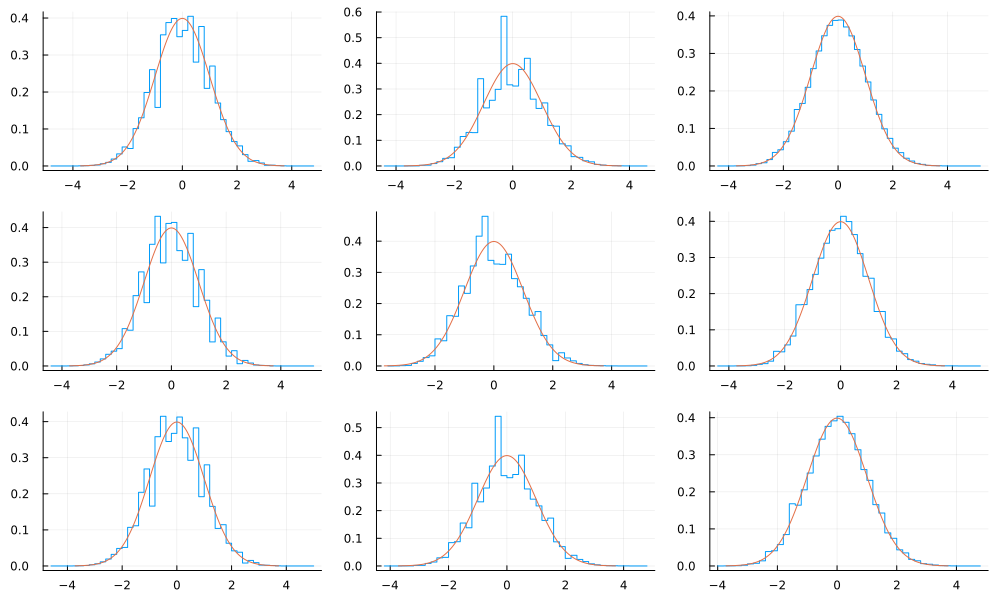

In [12]:
ASR = pearson_adjusted_standardized_residual.(X)
PP = []
for i in 1:3, j in 1:3
    P = stephist(getindex.(ASR, i, j); norm=true, bin=50, label="")
    plot!(Normal(); label="")
    push!(PP, P)
end
plot(PP...; size=(1000, 600), layout=(3, 3))